# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
##### Importing Modules, API Key, & Setting Range for Lattitude and Longitude #####

### DO NOT MODIFY THIS CELL ###

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
##### City List Generation Using Random Lattitude & Longitude and Citipy #####

### DO NOT MODIFY THIS CELL ###

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [9]:
type(cities)


list

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
##### Calling Key to Use with OpenWeatherMap Website & Setting URL #####

# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [11]:
##### Testing Data Pull and Results

# testing information pull
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbc804669600bd0db849339dc79a0670&q=yellowknife"
request = requests.get(url).json()

latitude = request["coord"]["lat"]
longitude = request["coord"]["lon"]

print(latitude)

62.456


In [14]:
##### PULLING WEATHER DATA (a sizable wait) #####

# Nested storage list for incoming data
city_wx = {"city":[],
           "lattitude":[],
           "longitude":[],
           "max_temperature":[],
           "humidity":[],
           "cloud_prct":[],
           "wind_speed":[]}

# City Index Number
n = 0

# Setting the Loop and Enumerating the Cities
for n, city in enumerate(cities):
    
    # try being used to verify any data is found
    try:
        # data being requested from the base URL and changed to a usable state with .json
        req = requests.get(base_url + f'&q={cities[n]}').json()

        # Depositing data into the nested storage list city.wx
        city_wx["city"].append(req['name'])
        city_wx["lattitude"].append(req['coord']['lat'])  # <--- list within list in the weather data
        city_wx["longitude"].append(req['coord']['lon'])
        city_wx["max_temperature"].append(req['main']['temp_max'])
        city_wx["humidity"].append(req['main']['humidity'])
        city_wx["cloud_prct"].append(req['clouds']['all'])
        city_wx["wind_speed"].append(req['wind']['speed'])
        
        # Log-printing each city as the data is being requested from the website
        print("City number "+ str(n) + " " + city + " is being pulled")
        
        # Bump up one to go on to next city
        n = n + 1
    
    # If the try fails - namely that the city name is not found on the weather data website
    except:
        
        # Log-print to inform that the city won't be in the weather data
        print("City number "+ str(n) + " " + city + " DOES NOT EXIST - NOT ADDED")
        
        # Bump up one to go on to the next city
        n = n + 1
        
        # Pass tells the program to keep going despite the error
        pass


City number 0 taolanaro DOES NOT EXIST - NOT ADDED
City number 1 laguna is being pulled
City number 2 busselton is being pulled
City number 3 barrow is being pulled
City number 4 tuktoyaktuk is being pulled
City number 5 khatanga is being pulled
City number 6 saint-philippe is being pulled
City number 7 lompoc is being pulled
City number 8 amderma DOES NOT EXIST - NOT ADDED
City number 9 avarua is being pulled
City number 10 new norfolk is being pulled
City number 11 tuatapere is being pulled
City number 12 lorengau is being pulled
City number 13 kaitangata is being pulled
City number 14 lebu is being pulled
City number 15 tautira is being pulled
City number 16 cape town is being pulled
City number 17 kawalu is being pulled
City number 18 rikitea is being pulled
City number 19 jamestown is being pulled
City number 20 flinders is being pulled
City number 21 clyde river is being pulled
City number 22 hermanus is being pulled
City number 23 kapaa is being pulled
City number 24 keetmanshoo

City number 201 trani is being pulled
City number 202 bandarbeyla is being pulled
City number 203 wagar is being pulled
City number 204 sibolga is being pulled
City number 205 barcelos is being pulled
City number 206 aklavik is being pulled
City number 207 tsienyane DOES NOT EXIST - NOT ADDED
City number 208 koson is being pulled
City number 209 nizhniy kuranakh is being pulled
City number 210 haines junction is being pulled
City number 211 vengerovo is being pulled
City number 212 cacahoatan is being pulled
City number 213 talpa is being pulled
City number 214 port macquarie is being pulled
City number 215 nuuk is being pulled
City number 216 ayna is being pulled
City number 217 berezovyy is being pulled
City number 218 luena is being pulled
City number 219 waipawa is being pulled
City number 220 mkushi is being pulled
City number 221 marsa matruh is being pulled
City number 222 upernavik is being pulled
City number 223 faanui is being pulled
City number 224 lishui is being pulled
Cit

City number 393 gambissara is being pulled
City number 394 samana is being pulled
City number 395 zyryanskoye is being pulled
City number 396 anadyr is being pulled
City number 397 bay city is being pulled
City number 398 vao is being pulled
City number 399 malpe is being pulled
City number 400 kruisfontein is being pulled
City number 401 bindura is being pulled
City number 402 cove is being pulled
City number 403 hua hin is being pulled
City number 404 saint-augustin is being pulled
City number 405 biltine is being pulled
City number 406 palmas bellas is being pulled
City number 407 andevoranto DOES NOT EXIST - NOT ADDED
City number 408 mantua is being pulled
City number 409 camacupa is being pulled
City number 410 plainview is being pulled
City number 411 athabasca is being pulled
City number 412 pacific grove is being pulled
City number 413 souillac is being pulled
City number 414 estelle is being pulled
City number 415 chiquilistlan is being pulled
City number 416 cuaspud is being 

City number 589 alyangula is being pulled
City number 590 ambilobe is being pulled
City number 591 trat is being pulled
City number 592 boddam is being pulled
City number 593 port hedland is being pulled
City number 594 lamu is being pulled
City number 595 lasa is being pulled
City number 596 wadi musa is being pulled
City number 597 sept-iles is being pulled
City number 598 taipu is being pulled
City number 599 grand island is being pulled
City number 600 arys is being pulled
City number 601 bolshiye chapurniki DOES NOT EXIST - NOT ADDED


In [15]:
# print our data - which just confirms it's not all the first city's data alone
pprint(city_wx)



{'city': ['Laguna',
          'Busselton',
          'Barrow',
          'Tuktoyaktuk',
          'Khatanga',
          'Saint-Philippe',
          'Lompoc',
          'Avarua',
          'New Norfolk',
          'Tuatapere',
          'Lorengau',
          'Kaitangata',
          'Lebu',
          'Tautira',
          'Cape Town',
          'Kawalu',
          'Rikitea',
          'Jamestown',
          'Flinders',
          'Clyde River',
          'Hermanus',
          'Kapaa',
          'Keetmanshoop',
          'Mataura',
          'Tasiilaq',
          'Bluff',
          'Arrecife',
          'Nālūt',
          'Ushuaia',
          'Hilo',
          'Merauke',
          'Isangel',
          'Saint George',
          'Dhidhdhoo',
          'Dunedin',
          'Punta Arenas',
          'Sfântu Gheorghe',
          'Bukachacha',
          'Carnarvon',
          'Hithadhoo',
          'Cherskiy',
          'Torbay',
          'Puerto Ayora',
          'Çumra',
          'Saldanha',


              100,
              58,
              93,
              69,
              73,
              77,
              75,
              86,
              78,
              28,
              65,
              36,
              56,
              27,
              94,
              79,
              74,
              47,
              20,
              53,
              20,
              40,
              97,
              94,
              26,
              50,
              86,
              55,
              94,
              21,
              97,
              40,
              73,
              79,
              69,
              87,
              47,
              95,
              36,
              64,
              94,
              63,
              83,
              84,
              81,
              41,
              51,
              50,
              75,
              6,
              69,
              99,
              96,
              40,
              49,
          

                     39.76,
                     48.2,
                     68,
                     41,
                     83.37,
                     22.91,
                     71.01,
                     68,
                     104.25,
                     82.9,
                     86,
                     -15.54,
                     66.99,
                     89.26,
                     77.07,
                     69.48,
                     19.4,
                     77,
                     70.25,
                     28.4,
                     70.72,
                     -5.35,
                     45,
                     49.12,
                     51.51,
                     41,
                     71.6,
                     102.2,
                     71.44,
                     51.8,
                     83.7,
                     78.19,
                     46.4,
                     32,
                     86.38,
                     82.56,
                     8

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [16]:
# convert to DataFrame, which is a LOT more readable!

weather_df = pd.DataFrame.from_dict(city_wx)
weather_df


,city,lattitude,longitude,max_temperature,humidity,cloud_prct,wind_speed
0,Laguna,38.4210,-121.4238,48.99,87,1,3.91
1,Busselton,-33.6500,115.3333,54.00,93,28,6.26
2,Barrow,71.2906,-156.7887,8.60,78,90,8.05
3,Tuktoyaktuk,69.4541,-133.0374,5.00,85,20,4.61
4,Khatanga,71.9667,102.5000,-5.57,97,39,10.51
...,...,...,...,...,...,...,...
556,Petra,30.3222,35.4793,66.78,23,2,5.86
557,Sept-Îles,50.2001,-66.3821,43.00,65,1,8.05
558,Taipu,-5.6217,-35.5967,87.80,78,40,11.50
559,Grand Island,40.9250,-98.3420,37.00,55,1,11.50


In [17]:
# Export weather_df into a CSV format file

weather_df.to_csv(r'C:\Users\maryl\Data_Science\Week_05\Weather_DF.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

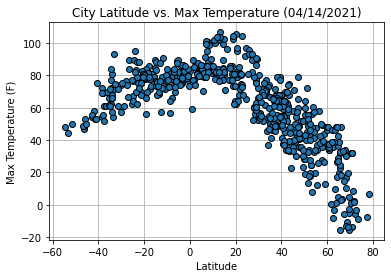

In [38]:
fig,ax = plt.subplots() 

ax.plot(weather_df["lattitude"], 
        weather_df["max_temperature"],
        marker = "o",
        markeredgecolor='k',
        linestyle = 'None')

ax.set(xlabel = "Latitude",
       ylabel = "Max Temperature (F)",
       title = "City Latitude vs. Max Temperature (04/14/2021)")

ax.grid()

plt.show()

#### Latitude vs. Humidity Plot

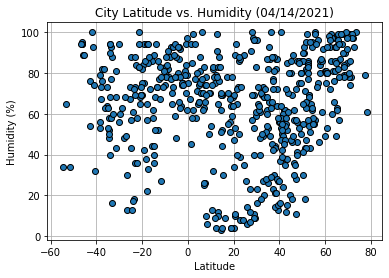

In [37]:
fig,ax = plt.subplots() 

ax.plot(weather_df["lattitude"], 
        weather_df["humidity"],
        marker = "o",
        markeredgecolor='k',
        linestyle = 'None')


ax.set(xlabel = "Latitude",
       ylabel = "Humidity (%)",
       title = "City Latitude vs. Humidity (04/14/2021)")
ax.grid()


plt.show()

#### Latitude vs. Cloudiness Plot

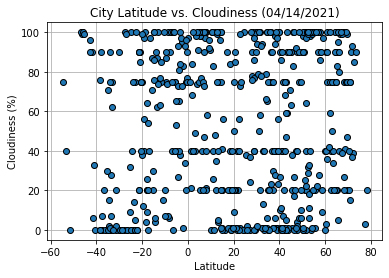

In [41]:
fig,ax = plt.subplots() 

ax.plot(weather_df["lattitude"], 
        weather_df["cloud_prct"],
        marker = "o",
        markeredgecolor='k',
        linestyle = 'None')


ax.set(xlabel = "Latitude",
       ylabel = "Cloudiness (%)",
       title = "City Latitude vs. Cloudiness (04/14/2021)")
ax.grid()


plt.show()

#### Latitude vs. Wind Speed Plot

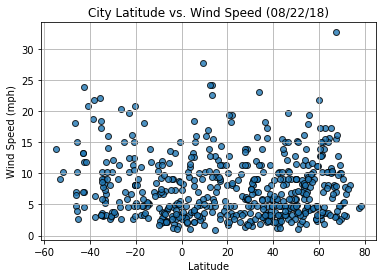

In [9]:
fig,ax = plt.subplots() 

ax.plot(weather_df["lattitude"], 
        weather_df["wind_speed"],
        marker = "o",
        markeredgecolor='k',
        linestyle = 'None')


ax.set(xlabel = "Latitude",
       ylabel = "Wind Speed (mph)",
       title = "City Latitude vs. Cloudiness (04/14/2021)")
ax.grid()


plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

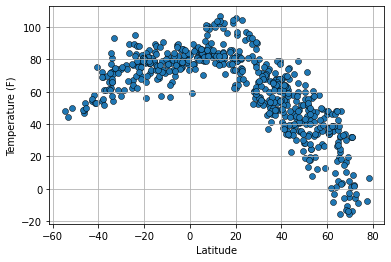

In [61]:
import seaborn as sns

ax = sns.scatterplot(x = 'lattitude', 
                     y = 'max_temperature',
                     data = weather_df,
                     edgecolor = "black")

ax.set(xlabel = "Latitude",
       ylabel="Temperature (F)"
       title = "City Latitude vs Temperature")

plt.grid()

plt.show()

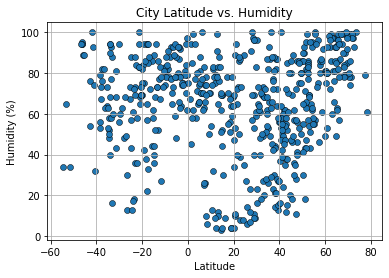

In [64]:
import seaborn as sns

ax = sns.scatterplot(x = 'lattitude', 
                     y = 'humidity',
                     data = weather_df,
                     edgecolor = "black")

ax.set(xlabel = "Latitude",
       ylabel="Humidity (%)", 
       title = "City Latitude vs. Humidity")

plt.grid()

plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

Looking at the Latitude vs. Maximum Temperature graph, seasonal variations might be thought to cause the temperatures to create a shallow arc from 40 degrees Farenheit at the most extreem southern measurement, to the peak into the hundreds near 20 degrees north of the equator, until the temperatures dive down below zero in the far north. Autumn in the southern hemisphere could certianly be the cause for the narrow range of temperatures, neither below freezing, nor above 100 degrees, while the coming of spring could explain why those above the equator range from over 100 degrees to well below freezing. The highest of temperatures are clustered around 20 degrees latitude, but the sun will not be at a 90 degree angle there until almost mid-June (when it will remain the longest in the sky). I would posit that land masses would skew the temperatures. 20 degrees latitude moves through the Sahara and the Rub' Al Khali desert that takes over almost all of Saudi Arabia and the Sahara desert. While it would seem that location might affect temperature, looking at the Humidity vs. City Latitudes seems to show that humidity does not look to affect temperature; where 100 degree temperatures were reported, so too were the widest range of humidity reports, while in the extreeme cold, hundred percent humidity is being reported. Is this, perhaps caused by the greater availability of water then at the 20 degree latitude mark?

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 